<h1><center>Carlos Mougan</center></h1>

<center> 
https://www.linkedin.com/in/carlosmougan/
</center>

<center> https://github.com/cmougan </center>


## Data Science Challenge

The purpose of this challenge is to assist us in evaluating candidates for a role in our Product team. We only pass this challenge to candidates that we feel have a solid background and could be a good fit for our team. We appreciate you taking this time to help ensure we’re a good fit for each other.

### Tips
- Include code, graphics and text in a combined output. Tell a story, and let us know very clearly about your thought and an analytical process


### Part 1: Experiment design
#### Background
In 2011 AirBnB ran some experiments which showed that when a property featured professional photography, users were much more likely to trust the property and consequently make a booking. So, AirBnB a launched [free professional photography service](https://www.airbnb.com/professional_photography) for all hosts. From inside the listing page, hosts were able to click a link to view more about the service, request a professional photographer, and subsequently (after the photo shoot) have their property profile updated with professional photos. 

The project initially proved to be a success:
- Guests were more likely to book a property that had professional photography
- Hosts were able to charge more for listings with professional photos

However, over time this also became a multimillion dollar operation and a challenge to manage across over 200 countries. 

Fast forward to 2016, and some new developments have also helped with building trust:

- 2013: Launch of identity verification for hosts and guests
- 2014: Launch of double blind reviews (neither host nor guest can see the other’s review), ensuring more honest reviews of properties and hosts. 
- 2015: Huge global PR lift for AirBnB, raising the profile of the company

An additional interesting development has also been the proliferation of smartphones with powerful and high-quality cameras (+apps) over the last few years, which has made it more possible for hosts to take good quality photos of their property. There is also the opinion that perhaps millennials have come to expect smartphone photos as the norm and are less likely to expect professional photography. 

#### Challenge

Since the professional photography service consumes so many operational and financial resources, AirBnB management are unsure if they should continue. AirBnB management have asked the Data Science team to analyse the impact of the professional photography service in order to determine whether or not they should continue funding the service. 

1. Provide full details about how you will run experiments to assess the impact of this service on both hosts and guests. How will you ensure that the experiments are valid and not biased? 



### Suggested approach 1: Modern Statistics - Machine Learning

**The idea** -> Make a roll-out window data split, fit a model for each split and analyze the evolution of the feature importances for each model through time.

 __Framing by window__  consists in reshaping the information we have by fixed windows that will give the model the most complete information possible at a given time point from the recent past, to achieve an accurate prediction. It is much like the expanding window, but the window size remains fixed and counts backwards from the most recent observation.

The idea will be to fit a model, with price/booked as the target, for different periods and check the importance of each coefficient. 

With this idea, we should be able to see that at the beginning that professional photography was one of the most important features and that with time the importance of these features decreased.

#### The experiment

The idea consists of building two separate models that will help us to determine the impact of the service in both hosts and guests. The design of the experiment will be as follows:

1. **Gather data**. In any data project, one of the most important steps is having the right data. There is a well-known quote saying: 'trash in, trash out'. Meaning that no matter what we do, if the provided data doesn't have any information, there is nothing we can do. To keep things unbiased is important that the data comes from a distribution that behaves like the real business one. Two techniques to measure if data comes from the same distribution is the Kolmogorov-Smirnov Test and Adversarial Training.


2. **Data\Feature Engineer.** Arrange all data to have the form of a tabular dataset. It is important to make sure that we have provided the right variables that modellize the business problem and that the features that we want to evaluate are contained within this tabular dataset. Proper encoding is also mandatory since algorithms work with numerical data.


3. **Validation Split.** To asses the performance of the model it is important to correctly validate the date. As explained before our proposed idea is to frame the data by temporal windows to asses the evolution of the importance of the predictors.


4. **Mathematical Modelling.** Choose the algorithm and metrics that are going to help to modellize the situation. For this situation probably the best algorithm is a linear regression with a penalty (Lasso, Ridge) that help us to set the coefficient of some variables to zero and a gradient boosting for high performance.


5. **Evaluate the Model.** Check the performance with a given metric, it is important to understand the range of values of the metric and its meaning. Obtain the values of the coefficients of both algorithms linear and gradient boosting. 



6. **Visualize the results.** Plot them at different periods where we want to understand which was the contribution of the different features. 


7. **Shiny Dashboard** One gadget that we can use to help us visualize what is the contribution of each feature to the decision in s Shiny dashboard. In the following link, we can see a shiny that we developed for the HackUPC2019 this October.

https://davidmasip.shinyapps.io/severity-predictor_copia_2/

### Suggested approach 2 : Classical Statistics

First we will create a dataset with all the information. Then we will split the dataset in two. One with the profesional photographies and the other one with the no profesional ones. I will then compare for a certain date the distribution of prices, that ideally should look like it has a gaussian distribution.

 - If both distribution look identically. There is no visual correlation between having a profesional photography or not.
 
 - If they look different, there is a difference between the two of them. We can check where is the mean, the standard deviation. 
 
One way to measure if there is a difference between the two sets of data is doing a **Kolmogorov–Smirnov test** (K–S test or KS test) that is a nonparametric test of the equality of continuous one-dimensional probability distributions that can be used to compare two samples distribution between them. This test returns a p-value indicating how good the hypothesis is.


Let's see an example of it:

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.style.use('seaborn-whitegrid')

In [2]:
mu, sigma = 40, 5 # mean and standard deviation
normal = np.random.normal(mu, sigma, 10000)

mu, sigma = 50, 7 # mean and standard deviation
professional = np.random.normal(mu, sigma, 10000)

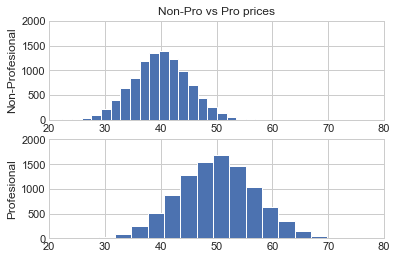

In [3]:
plt.subplot(2, 1, 1)
plt.hist(normal,bins=20)
plt.ylabel('Non-Profesional')
plt.title('Non-Pro vs Pro prices')
plt.axis([20, 80, 0, 2_000])

plt.subplot(2, 1, 2)
plt.ylabel('Profesional')
plt.hist(professional,bins=20)
plt.axis([20, 80, 0, 2_000])
plt.show()

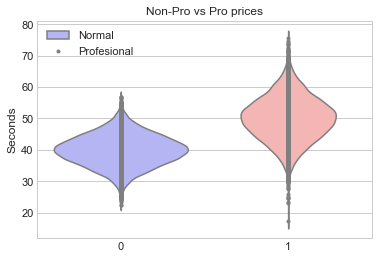

In [4]:
d =[normal,professional]

plt.figure()
# Show each distribution with both violins and points
sns.violinplot(data=d, palette='bwr', inner="points")
plt.title('Non-Pro vs Pro prices')
plt.ylabel('Seconds')
plt.legend(labels=['Normal', 'Profesional'])
plt.show()

__KS test__

In [5]:
from scipy import stats
stats.ks_2samp(normal,professional)

Ks_2sampResult(statistic=0.6121, pvalue=0.0)

A low p value aknowledge us that both samples come from different distributions so having a profesional picture or not matters. 

The user can play with mu and sigma parameters of both distributions to see how both graphs change and the KS test changes its values.

__ttest__

In [6]:
t2, p2 = stats.ttest_ind(normal,professional)
print('t:',t2)
print('p:',p2)

t: -117.46107583267495
p: 0.0


The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups.


### Part 2: Result analysis

#### Background
A ride hailing app currently assigns new incoming trips to the _closest_ available vehicle. To compute such distance, the app currently computes haversine distance between the pickup point and each of the available vehicles. We refer to this distance as *linear*.

However, the expected time to reach A from B in a city is not 100% defined by Haversine distance:
Cities are known to be places where huge amount of transport infrastructure (roads, highways, bridges, tunnels) is deployed to increase capacity and reduce average travel time. Interestingly, this heavy investment in infrastructure also implies that bird distance does not work so well as proxy, so the isochrones for travel time from certain location drastically differ from the perfect circle defined by bird distance, as we can see in this example from CDMX where the blue area represents that it is reachable within a 10 min drive. 

![Imgur](https://i.imgur.com/hYXhpiM.png)
 
In addition to this, travel times can be drastically affected by traffic, accidents, road work...So that even if a driver is only 300m away, he might need to drive for 10 min because of road work in a bridge.

#### Proposal
In order to optimise operations, engineering team has suggested they could query an external real time maps API that not only has roads, but also knows realtime traffic information. We refer to this distance as *road* distance.

In principle this assigment is more efficient and should outperform *linear*. However, the queries to the maps API have a certain cost (per query) and increase the complexity and reliability of a critical system within the company. So Data Science team has designed an experiment to help engineering to decide

#### Experimental design

The designed expirement is very simple. For a period of 5 days, all trips in 3 cities (Bravos, Pentos and Volantis) have been randomly assigned using *linear* or *road* distance:

* Trips whose *trip_id* starts with digits 0-8 were assigned using *road* distance
* Trips whose *trip_id* starts with digits 9-f were assigned using *linear* distance

#### Data description
The collected data is available available in [this link](https://www.dropbox.com/s/e3j1pybfz5o3vq9/intervals_challenge.json.gz?dl=0). Each object represent a `vehicle_interval` that contains the following attributes:

* `type`: can be `going_to_pickup`, `waiting_for_rider` or `driving_to_destination` 
* `trip_id`: uniquely identifies the trip
* `duration`: how long the interval last, in seconds
* `distance`: how far the vehicle moved in this interval, in meters
* `city_id`: either bravos, pentos and volantis
* `started_at`: when the interval started, UTC Time
* `vehicle_id`: uniquely identifies the vehicle
* `rider_id`: uniquely identifies the rider

#### Example
```
{
  "duration": 857,
  "distance": 5384,
  "started_at": 1475499600.287,
  "trip_id": "c00cee6963e0dc66e50e271239426914",
  "vehicle_id": "52d38cf1a3240d5cbdcf730f2d9a47d6",
  "city_id": "pentos",
  "type": "driving_to_destination"
}
```

#### Challenge
Try to answer the following questions

1. Should the company move towards *road* distance? What's the max price it would make sense to pay per query? (make all the  assumptions you need, and make them explicit)
2. How would you improve the experimental design? Would you collect any additional data? 




In [7]:
import scipy
import pandas as pd

In [8]:
df = pd.read_json('intervals_challenge.json', lines=True)

In [9]:
# We detect some NaNs. Lets make them np.nan and drop them for simplicity.
# We could treat NaNs in several ways: Impute with mean or median, impute them in crossvalidation, a different value etc...
df = df.replace('NA', np.nan, regex=True).dropna()

We will not take into consideration the trajectories where type is waiting for rider.

In [10]:
# Filtrar por una ciudad
#df = df[df['city_id']=='volantis']

In [11]:
# Drop waiting for rider
df = df[df['type'] != 'waiting_for_rider']

In [12]:
# Convert to time and extract hour
df['started_at']= pd.to_datetime(df.started_at)

df['day'] = df['started_at'].dt.day
df['hour'] = df['started_at'].dt.hour
df['minute'] = df['started_at'].dt.minute

Let's bin a continuous feature

In [13]:
df['night'] = np.where(df.hour<8,1,0)
df['morning'] = np.where((df.hour>8) & (df.hour<16),1,0)
df['afternoon'] = np.where((df.hour>16),1,0)

Extract wether the trip is done with custom distance or linear

In [14]:
%%time
# We have tried with both first[0] and last[-1]
def get_metric(trip_id):
    '''
    Receives a string, if the first digit is 0-8 returns LINEAR else return CUSTOM
    '''
    first_let = trip_id[0]
    try:
        first_dig = int(first_let)
        if (first_dig in range(0,8)):
            return("LINEAR")
        else:
            return("CUSTOM")   
    except:
        return("CUSTOM")

df['metric'] = df.apply(lambda x: get_metric(x.trip_id),axis = 1)

CPU times: user 1.98 s, sys: 16.4 ms, total: 2 s
Wall time: 2.01 s


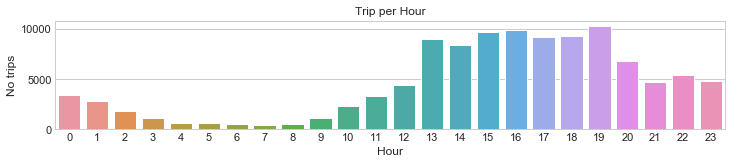

In [15]:
# pickup distribution, by hour
plt.figure(figsize=(12,2))

data = df.groupby('hour').aggregate({'trip_id':'count'}).reset_index()
sns.barplot(x='hour', y='trip_id', data=data)

plt.title('Trip per Hour')
plt.xlabel('Hour')
plt.ylabel('No trips')
plt.show()

We detected some outliers and we treated them with winsorization before doing a violin plot.

Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

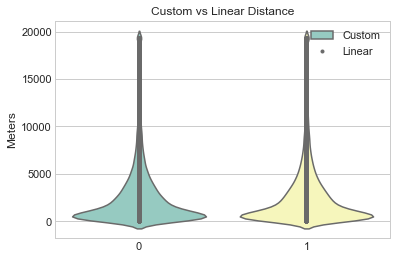

In [16]:
df['distance'] = scipy.stats.mstats.winsorize(df.distance, limits=0.01)
d =[df[df['metric']=='CUSTOM'].distance,df[df['metric']!='CUSTOM'].distance]

plt.figure()
# Show each distribution with both violins and points
sns.violinplot(data=d, palette='Set3', inner="points")
plt.title('Custom vs Linear Distance')
plt.ylabel('Meters')
plt.legend(labels=['Custom', 'Linear'])
plt.show()

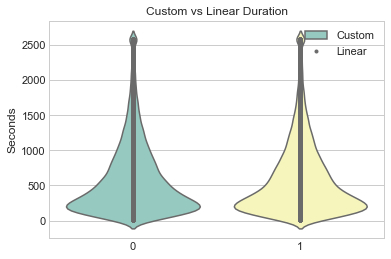

In [17]:
df['duration'] = scipy.stats.mstats.winsorize(df.duration, limits=0.01)
d =[df[df['metric']=='CUSTOM'].duration,df[df['metric']!='CUSTOM'].duration]

plt.figure()
# Show each distribution with both violins and points
sns.violinplot(data=d, palette='Set3', inner="points")
plt.title('Custom vs Linear Duration')
plt.ylabel('Seconds')
plt.legend(labels=['Custom', 'Linear'])
plt.show()

We see that even after winsorization,thre are a group of trips that exceed the 10km distance and the 30 mins of duration

Lets create the feature **average speed** of the trip. 

In [18]:
df['speed'] = df['distance']/df['duration']

In [19]:
df.isna().sum()

city_id       0
distance      0
duration      0
started_at    0
trip_id       0
type          0
vehicle_id    0
day           0
hour          0
minute        0
night         0
morning       0
afternoon     0
metric        0
speed         0
dtype: int64

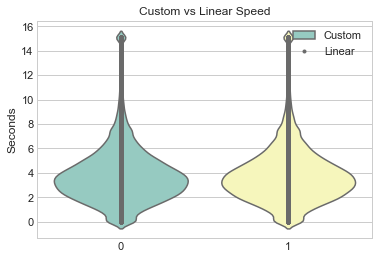

In [20]:
df['speed'] = scipy.stats.mstats.winsorize(df.speed, limits=0.01)
df= df.dropna()
d =[df[df['metric']=='CUSTOM'].speed,df[df['metric']!='CUSTOM'].speed]

plt.figure()
# Show each distribution with both violins and points
sns.violinplot(data=d, palette='Set3', inner="points")
plt.title('Custom vs Linear Speed')
plt.ylabel('Seconds')
plt.legend(labels=['Custom', 'Linear'])
plt.show()

In [21]:
df[df['metric']=='LINEAR'].describe()

,distance,duration,day,hour,minute,night,morning,afternoon,speed
count,55544.000000,55544.000000,55544.000000,55544.000000,55544.000000,55544.000000,55544.000000,55544.000000,55544.000000
mean,2698.888503,599.311087,3.549168,15.118879,29.182306,0.102783,0.345834,0.457277,3.891875
std,3361.819633,523.569971,0.497581,5.603220,17.349417,0.303678,0.475644,0.498176,2.419979
min,0.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,581.000000,217.000000,3.000000,13.000000,14.000000,0.000000,0.000000,0.000000,2.349597
50%,1481.000000,433.000000,4.000000,16.000000,29.000000,0.000000,0.000000,0.000000,3.524687
75%,3522.000000,834.000000,4.000000,19.000000,44.000000,0.000000,1.000000,1.000000,4.893245
max,19335.000000,2583.000000,4.000000,23.000000,59.000000,1.000000,1.000000,1.000000,15.083333


In [22]:
df[df['metric']!='LINEAR'].describe()

,distance,duration,day,hour,minute,night,morning,afternoon,speed
count,54765.000000,54765.000000,54765.000000,54765.000000,54765.000000,54765.000000,54765.000000,54765.000000,54765.000000
mean,2676.068894,597.166822,3.546809,15.126796,29.224979,0.101890,0.345166,0.458906,3.868999
std,3338.003525,520.552687,0.497809,5.587488,17.370131,0.302506,0.475427,0.498313,2.402074
min,0.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,578.000000,217.000000,3.000000,13.000000,14.000000,0.000000,0.000000,0.000000,2.339652
50%,1465.000000,432.000000,4.000000,16.000000,29.000000,0.000000,0.000000,0.000000,3.514124
75%,3486.000000,832.000000,4.000000,19.000000,44.000000,0.000000,1.000000,1.000000,4.874439
max,19335.000000,2583.000000,4.000000,23.000000,59.000000,1.000000,1.000000,1.000000,15.083333


__ttest__

In [23]:
t2, p2 = stats.ttest_ind(df[df['metric']=='CUSTOM'].speed,df[df['metric']!='CUSTOM'].speed)

 The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups.

In [24]:
t2

-1.5755181926011994

In [25]:
p2

0.11513975033156397

We were not able to distinguish any statistical difference with classical statistics.

# Let's try with ML

### Can we predict the duration of a trip?

Let's do a basic encoding and run an algorith to try it

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostRegressor,CatBoostClassifier

In [27]:
def one_hot_simple(df,columns_encoding,erase=False):
    '''
    Extremely basic method and non optimized method for One Hot Encoding, 
    receives a dataframe and a list of columns to encode.
    Returns the dataframe with or without the original columns (erase) 
    '''
    for col in columns_encoding:
        variables = df[col].unique()
        for v in variables:
            df[col + str(v)] = [1 if row == v else 0 for row in df[col].values]
    if erase:
        return df.drop(columns=columns_encoding)
    return df

In [28]:
cols_ohe = ['city_id','type','metric']

df= one_hot_simple(df,cols_ohe)

 This variable will allow to see which features are important and which are not

In [29]:
df['rand'] = np.random.random(size=[df.shape[0],1])

Basic train test split

In [30]:
X_tr, X_te, y_tr, y_te = train_test_split(df.drop(columns=['duration','distance','speed'])._get_numeric_data(),df.speed)

In [31]:
cb = CatBoostRegressor(iterations=300)
cb.fit(X_tr,y_tr)

0:	learn: 4.4660039	total: 75ms	remaining: 22.4s
1:	learn: 4.3640417	total: 84.8ms	remaining: 12.6s
2:	learn: 4.2656443	total: 96.2ms	remaining: 9.53s
3:	learn: 4.1706216	total: 108ms	remaining: 8s
4:	learn: 4.0791834	total: 120ms	remaining: 7.08s
5:	learn: 3.9908926	total: 128ms	remaining: 6.29s
6:	learn: 3.9067423	total: 136ms	remaining: 5.68s
7:	learn: 3.8253544	total: 143ms	remaining: 5.22s
8:	learn: 3.7474509	total: 150ms	remaining: 4.85s
9:	learn: 3.6726373	total: 159ms	remaining: 4.61s
10:	learn: 3.6007878	total: 167ms	remaining: 4.38s
11:	learn: 3.5319676	total: 172ms	remaining: 4.13s
12:	learn: 3.4659574	total: 180ms	remaining: 3.98s
13:	learn: 3.4024662	total: 188ms	remaining: 3.84s
14:	learn: 3.3412773	total: 195ms	remaining: 3.71s
15:	learn: 3.2831438	total: 203ms	remaining: 3.61s
16:	learn: 3.2274354	total: 210ms	remaining: 3.5s
17:	learn: 3.1741606	total: 218ms	remaining: 3.42s
18:	learn: 3.1226669	total: 224ms	remaining: 3.32s
19:	learn: 3.0745114	total: 232ms	remaining:

167:	learn: 2.1181003	total: 1.83s	remaining: 1.44s
168:	learn: 2.1180056	total: 1.84s	remaining: 1.43s
169:	learn: 2.1179340	total: 1.85s	remaining: 1.42s
170:	learn: 2.1178417	total: 1.86s	remaining: 1.41s
171:	learn: 2.1177679	total: 1.88s	remaining: 1.4s
172:	learn: 2.1176489	total: 1.89s	remaining: 1.39s
173:	learn: 2.1174797	total: 1.9s	remaining: 1.38s
174:	learn: 2.1173394	total: 1.92s	remaining: 1.37s
175:	learn: 2.1172658	total: 1.96s	remaining: 1.38s
176:	learn: 2.1172139	total: 1.96s	remaining: 1.36s
177:	learn: 2.1170574	total: 1.97s	remaining: 1.35s
178:	learn: 2.1170084	total: 1.98s	remaining: 1.34s
179:	learn: 2.1168668	total: 1.99s	remaining: 1.33s
180:	learn: 2.1168144	total: 2s	remaining: 1.31s
181:	learn: 2.1167398	total: 2s	remaining: 1.3s
182:	learn: 2.1166718	total: 2.01s	remaining: 1.29s
183:	learn: 2.1166043	total: 2.02s	remaining: 1.27s
184:	learn: 2.1165199	total: 2.03s	remaining: 1.26s
185:	learn: 2.1163642	total: 2.04s	remaining: 1.25s
186:	learn: 2.1163219

In [32]:
cb.score(X_tr,y_tr)

0.23540719361910156

In [33]:
cb.score(X_te,y_te)

0.22738837755288022

In [34]:
def plot_feature_importance(columnas,model_features,columns_ploted=10,model_name='Catboost'):
    ''' 
    This function receives a set of columns feeded to a model, and the importance of each of feature.
    Returns a graphical visualization
    '''
    feature_importance = pd.Series(index = columnas, data = np.abs(model_features))
    n_selected_features = (feature_importance>0).sum()
    print('{0:d} features, reduction of {1:2.2f}%'.format(n_selected_features,(1-n_selected_features/len(feature_importance))*100))
    plt.figure()
    feature_importance.sort_values().tail(columns_ploted).plot(kind = 'bar', figsize = (18,6))
    plt.title('Feature Importance for {}'.format(model_name))
    plt.show()

14 features, reduction of 0.00%


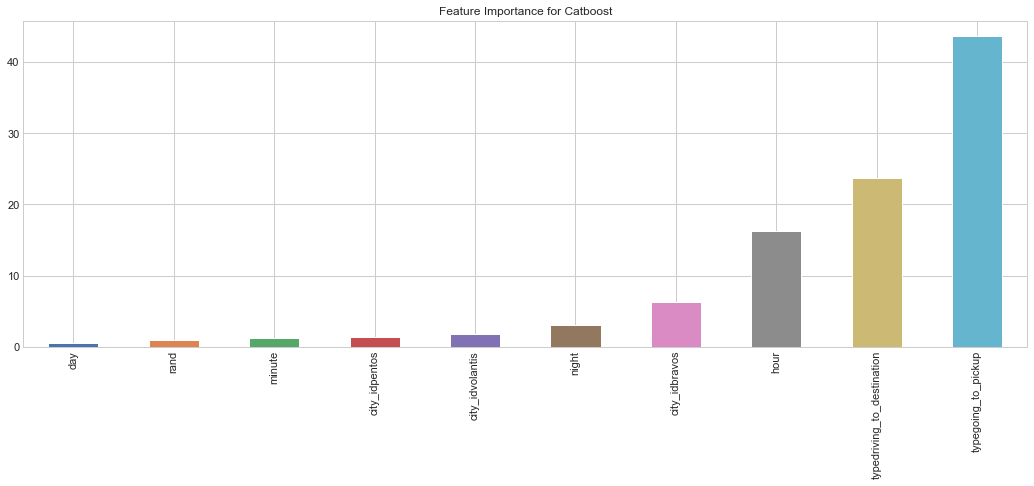

In [35]:
plot_feature_importance(X_tr.columns,
                        cb.get_feature_importance(),10)

The type of metric doesn't appear in the model. Everything below the 'rand' variable has worst predictive power than random.

## Can we predict if the metrics are randomly assigned?

In [36]:
cb = CatBoostClassifier(iterations=300)

In [37]:
df.head()

,city_id,distance,duration,started_at,trip_id,type,vehicle_id,day,hour,minute,...,metric,speed,city_idpentos,city_idvolantis,city_idbravos,typedriving_to_destination,typegoing_to_pickup,metricCUSTOM,metricLINEAR,rand
0,pentos,5384.0,857.0,2016-10-03 13:00:00.286999941,c00cee6963e0dc66e50e271239426914,driving_to_destination,52d38cf1a3240d5cbdcf730f2d9a47d6,3,13,0,...,CUSTOM,6.282380,1,0,0,1,0,1,0,0.329590
1,volantis,1248.0,245.0,2016-10-03 13:00:00.852999926,427425e1f4318ca2461168bdd6e4fcbd,going_to_pickup,8336b28f24c3e7a1e3d582073b164895,3,13,0,...,LINEAR,5.093878,0,1,0,0,1,0,1,0.979783
2,pentos,5847.0,1249.0,2016-10-03 13:00:01.670000076,757867f6d7c00ef92a65bfaa3895943f,driving_to_destination,8885c59374cc539163e83f01ed59fd16,3,13,0,...,LINEAR,4.681345,1,0,0,1,0,0,1,0.857122
3,bravos,2585.0,471.0,2016-10-03 13:00:01.841000080,d09d1301d361f7359d0d936557d10f89,going_to_pickup,81b63920454f70b6755a494e3b28b3a7,3,13,0,...,CUSTOM,5.488323,0,0,1,0,1,1,0,0.008676
4,pentos,743.0,182.0,2016-10-03 13:00:01.970000029,00f20a701f0ec2519353ef3ffaf75068,going_to_pickup,b73030977cbad61c9db55418909864fa,3,13,0,...,LINEAR,4.082418,1,0,0,0,1,0,1,0.041946


In [38]:
#Basic train test split

X_tr, X_te, y_tr, y_te = train_test_split(df.drop(columns=['metric','metricLINEAR','metricCUSTOM'])._get_numeric_data(),df.metricLINEAR)

In [39]:
cb.fit(X_tr,y_tr)

Learning rate set to 0.170887
0:	learn: 0.6929898	total: 32.2ms	remaining: 9.64s
1:	learn: 0.6928149	total: 58.8ms	remaining: 8.77s
2:	learn: 0.6927140	total: 85.9ms	remaining: 8.5s
3:	learn: 0.6926192	total: 110ms	remaining: 8.15s
4:	learn: 0.6924919	total: 135ms	remaining: 7.94s
5:	learn: 0.6923869	total: 190ms	remaining: 9.33s
6:	learn: 0.6922992	total: 230ms	remaining: 9.64s
7:	learn: 0.6922448	total: 256ms	remaining: 9.34s
8:	learn: 0.6921297	total: 289ms	remaining: 9.34s
9:	learn: 0.6920293	total: 314ms	remaining: 9.09s
10:	learn: 0.6919244	total: 338ms	remaining: 8.87s
11:	learn: 0.6918504	total: 360ms	remaining: 8.64s
12:	learn: 0.6917554	total: 384ms	remaining: 8.48s
13:	learn: 0.6916483	total: 406ms	remaining: 8.3s
14:	learn: 0.6915729	total: 429ms	remaining: 8.15s
15:	learn: 0.6914657	total: 453ms	remaining: 8.04s
16:	learn: 0.6913812	total: 475ms	remaining: 7.91s
17:	learn: 0.6913079	total: 506ms	remaining: 7.92s
18:	learn: 0.6912262	total: 545ms	remaining: 8.06s
19:	learn:

163:	learn: 0.6790727	total: 3.83s	remaining: 3.17s
164:	learn: 0.6789599	total: 3.85s	remaining: 3.15s
165:	learn: 0.6788764	total: 3.87s	remaining: 3.12s
166:	learn: 0.6787563	total: 3.89s	remaining: 3.1s
167:	learn: 0.6786941	total: 3.91s	remaining: 3.07s
168:	learn: 0.6786093	total: 3.93s	remaining: 3.05s
169:	learn: 0.6785501	total: 3.95s	remaining: 3.02s
170:	learn: 0.6784720	total: 3.97s	remaining: 3s
171:	learn: 0.6784063	total: 3.99s	remaining: 2.97s
172:	learn: 0.6783449	total: 4.01s	remaining: 2.95s
173:	learn: 0.6782839	total: 4.04s	remaining: 2.92s
174:	learn: 0.6782051	total: 4.06s	remaining: 2.9s
175:	learn: 0.6781099	total: 4.08s	remaining: 2.87s
176:	learn: 0.6780370	total: 4.1s	remaining: 2.85s
177:	learn: 0.6779693	total: 4.12s	remaining: 2.82s
178:	learn: 0.6778817	total: 4.14s	remaining: 2.8s
179:	learn: 0.6778208	total: 4.16s	remaining: 2.77s
180:	learn: 0.6777277	total: 4.18s	remaining: 2.75s
181:	learn: 0.6776356	total: 4.2s	remaining: 2.72s
182:	learn: 0.677572

15 features, reduction of 0.00%


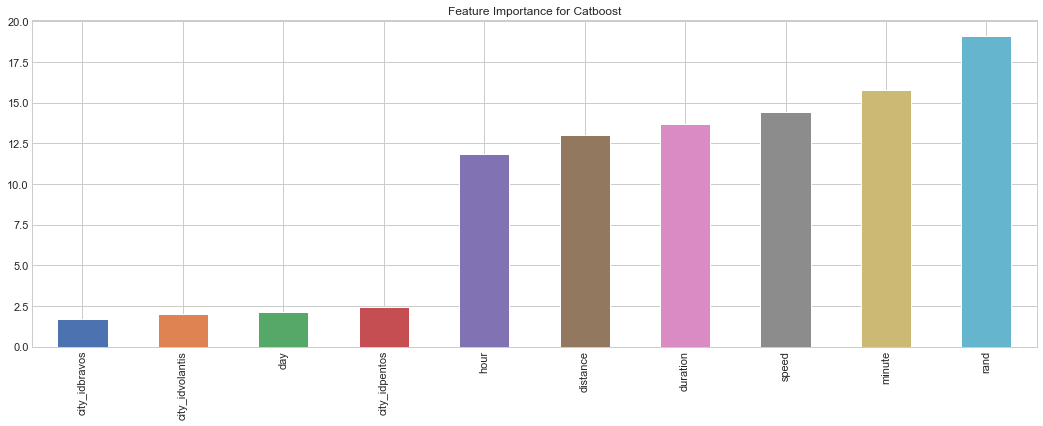

In [40]:
plot_feature_importance(X_tr.columns,
                        cb.get_feature_importance(),10)

In [41]:
print('The roc_auc score is {}'.format(roc_auc_score(y_te, cb.predict(X_te))))


The roc_auc score is 0.5025890004778739


We can see that we achieve a random prediction, meaning that CUSTOM and LINEAR metrics are randomly assigned. There is no feature importance higher than the random variable, that let's us know that there is no information when we try to predict wether a trip is Linear or Custom distance.

Also an AUC value of 0.5 shows us that the predicitions are done randomly

<h2><center>Conclusion</center></h2>

For the assignment 2, we have been able to determine both with Machine Learning and classical statistics that there is **no statistical difference** between both distances.

Let's remember that we are assuming that there is no error in the data collection. So keeping that in mind, we suggest that:

 - Since we have to pay for using the API and we are not seeing any improvement at any hour, distance or city, to **keep using linear** (haversine) distance.

It is important to say that I personally find this result contra intuitive but the statistical test makes me take a data driven decision towards the analitically best solution. 


In order to improve the data and make a better analysis we would reccomend:

 - Making sure that data is collected in the right way.
 - Extending the experiment for more days, two days is just to few.